In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('student.csv')
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [3]:
data.dtypes

gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object

In [4]:
num_data=data._get_numeric_data()

In [5]:
num_data.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,15,16,2,20
1,20,20,3,25
2,10,7,0,30
3,30,25,5,35
4,40,50,12,50


In [6]:
num_data.corr()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
raisedhands,1.000000,0.691572,0.643918,0.339386
VisITedResources,0.691572,1.000000,0.594500,0.243292
AnnouncementsView,0.643918,0.594500,1.000000,0.417290
Discussion,0.339386,0.243292,0.417290,1.000000


In [7]:
cat_data=data.select_dtypes(include=['object'])

In [8]:
cat_data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,M


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
lb=LabelEncoder()

In [11]:
cat_data=cat_data.apply(lb.fit_transform)

In [12]:
cat_data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,1,1,1,2
1,1,4,4,2,1,0,7,0,0,1,1,1,2
2,1,4,4,2,1,0,7,0,0,0,0,0,1
3,1,4,4,2,1,0,7,0,0,0,0,0,1
4,1,4,4,2,1,0,7,0,0,0,0,0,2


In [13]:
X=cat_data.drop(['Class'],1)
X.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
0,1,4,4,2,1,0,7,0,0,1,1,1
1,1,4,4,2,1,0,7,0,0,1,1,1
2,1,4,4,2,1,0,7,0,0,0,0,0
3,1,4,4,2,1,0,7,0,0,0,0,0
4,1,4,4,2,1,0,7,0,0,0,0,0


In [14]:
y=cat_data['Class']
y.head()

0    2
1    2
2    1
3    1
4    2
Name: Class, dtype: int32

In [15]:

from sklearn.feature_selection import chi2

In [16]:
chi_scores = chi2(X,y)

In [17]:
chi_scores

(array([12.15019023,  6.95502702,  9.75721839,  1.36112198,  7.18665588,
         0.51585055, 13.90388171,  3.99229972, 47.97176733, 41.72203414,
        26.81722745, 89.6127511 ]),
 array([2.29942746e-03, 3.08841086e-02, 7.60758735e-03, 5.06332865e-01,
        2.75066375e-02, 7.72652965e-01, 9.56776387e-04, 1.35857347e-01,
        3.82880351e-11, 8.71315417e-10, 1.50214912e-06, 3.47406824e-20]))

In [18]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

In [19]:
import matplotlib.pyplot as plt

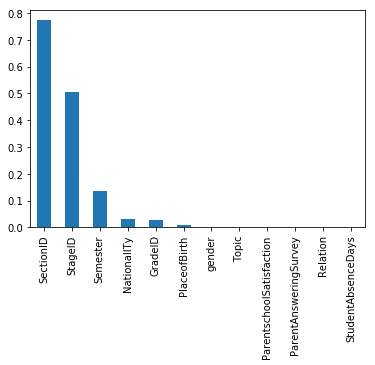

In [20]:
p_values.plot.bar()

In [21]:
data.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [24]:
from scipy.stats import pointbiserialr

In [31]:
pbc = pointbiserialr(num_data.raisedhands,y)
print(pbc)

PointbiserialrResult(correlation=-0.23101578434712627, pvalue=3.096280642819495e-07)


In [32]:
pbc = pointbiserialr(num_data.AnnouncementsView,y)
print(pbc)

PointbiserialrResult(correlation=-0.14399589996628834, pvalue=0.0015611683154393438)


In [33]:
pbc = pointbiserialr(num_data.Discussion,y)
print(pbc)

PointbiserialrResult(correlation=-0.12197106866705337, pvalue=0.0074666828738497275)


In [34]:
pbc = pointbiserialr(num_data.VisITedResources,y)
print(pbc)

PointbiserialrResult(correlation=-0.1617480215704172, pvalue=0.00037377844330801943)


In [35]:
d=cat_data[['gender','Topic','ParentschoolSatisfaction','ParentAnsweringSurvey','Relation','StudentAbsenceDays']]

In [36]:
d1=data[['raisedhands']]
d1.head()

,raisedhands
0,15
1,20
2,10
3,30
4,40


In [37]:
final=pd.concat([d,d1],axis=1)

In [38]:
final.head()

,gender,Topic,ParentschoolSatisfaction,ParentAnsweringSurvey,Relation,StudentAbsenceDays,raisedhands
0,1,7,1,1,0,1,15
1,1,7,1,1,0,1,20
2,1,7,0,0,0,0,10
3,1,7,0,0,0,0,30
4,1,7,0,0,0,0,40


In [51]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()


In [52]:
from sklearn.model_selection import train_test_split

In [53]:
xtrain,xtest,ytrain,ytest=train_test_split(final,y,test_size=0.3,random_state=42)

In [54]:
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

C:\Users\Raj\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Raj\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Raj\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Raj\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [55]:
from sklearn.naive_bayes import GaussianNB

In [56]:
model=GaussianNB()
model.fit(xtrain,ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [57]:
y_pred=model.predict(xtest)
y_pred[0:5]

array([2, 2, 0, 0, 0])

In [58]:
ytest[0:5]

73     2
414    1
394    0
277    0
399    0
Name: Class, dtype: int32

In [59]:
model.score(xtest,ytest)

0.7013888888888888

In [60]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
lb=LabelEncoder()

In [63]:
data=data.apply(lb.fit_transform)

In [64]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,18,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,23,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,28,0,0,0,1
3,1,4,4,2,1,0,7,0,0,29,24,5,33,0,0,0,1
4,1,4,4,2,1,0,7,0,0,35,43,12,46,0,0,0,2
